### PREDIKSI HARGA CABAI

- **Nama:** Tazky Khumaira Tsany
- **Email:**   mc589d5x2489@student.devacademy.id
- **ID Dicoding:** MC589D5X2489


Pada prediksi harga cabai ini,saya menggunakan data harga cabai dengan Dataset yang terdiri dari 500 baris dan 2 kolom, yang mencakup dua variabel: satu yang mewakili waktu (seperti tanggal atau periode) dan satu lagi yang menunjukkan harga cabai.

In [1]:
!pip install keras_preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.5 MB/s eta 0:00:00


### Import Library

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Untuk model
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

### Load Data dan Explorasi Data

In [55]:
# Load the dataset
file_path = '/content/dataset.csv'
data = pd.read_csv(file_path)

In [56]:
# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%y')
# Preview the first few rows of the dataset
data.head()

,date,value
0,2022-08-03,56700
1,2022-08-04,58430
2,2022-08-05,57200
3,2022-08-06,57380
4,2022-08-07,56480


### Visualisasi Data

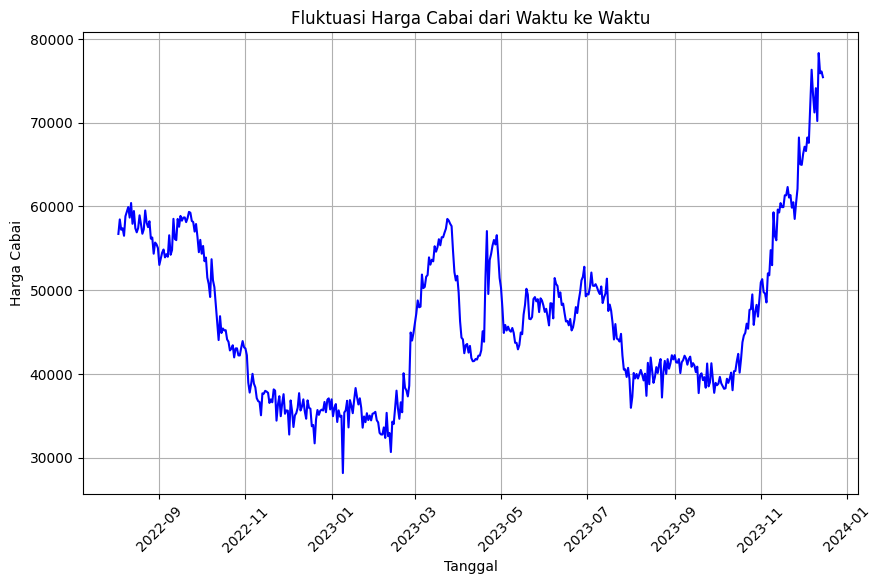

In [57]:
# Visualize the data
plt.figure(figsize=(10,6))
plt.plot(data['date'], data['value'], label='Harga Cabai', color='blue')
plt.title('Fluktuasi Harga Cabai dari Waktu ke Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Harga Cabai')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


### Data Preparation

Membagi kumpulan data menjadi data pelatihan dan pengujian

In [62]:
# Split the dataset into training and testing data
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Use the 'value' column as the target variable (dependent variable)
X_train = np.array(range(len(train))).reshape(-1, 1)  # Dummy independent variable (time step)
y_train = train['value']

X_test = np.array(range(len(train), len(data))).reshape(-1, 1)
y_test = test['value']


Mengatur 'tanggal' sebagai indeks

In [82]:
if 'date' in data.columns:
    data.set_index('date', inplace=True)

display(data.head())

,value
date,
2022-08-03,56700
2022-08-04,58430
2022-08-05,57200
2022-08-06,57380
2022-08-07,56480


Mengatur frekuensi ke harian

In [64]:
data = data.asfreq('D')

display(data.head())

,value
date,
2022-08-03,56700
2022-08-04,58430
2022-08-05,57200
2022-08-06,57380
2022-08-07,56480


Menangani nilai yang hilang

In [65]:
# Handle missing values (NaNs)
data['value'] = data['value'].interpolate(method='linear')

display(data.head())

,value
date,
2022-08-03,56700
2022-08-04,58430
2022-08-05,57200
2022-08-06,57380
2022-08-07,56480


## Membangun dan Melatih Model ARIMA

Membagi data menjadi set pelatihan dan penguji

In [66]:
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

display(train.head())  # Menampilkan beberapa baris pertama dari data pelatihan
display(test.head())   # Menampilkan beberapa baris pertama dari data pengujian

,value
date,
2022-08-03,56700
2022-08-04,58430
2022-08-05,57200
2022-08-06,57380
2022-08-07,56480


,value
date,
2023-09-07,41640
2023-09-08,42160
2023-09-09,41840
2023-09-10,41090
2023-09-11,41770


Membangun dan melatih model ARIMA

In [67]:
arima_model = ARIMA(train['value'], order=(5, 1, 0))  # ARIMA(p,d,q)
arima_model_fit = arima_model.fit()

print(arima_model_fit.summary())  # Menampilkan ringkasan model

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  400
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -3533.966
Date:                Sat, 10 May 2025   AIC                           7079.932
Time:                        04:41:03   BIC                           7103.866
Sample:                    08-03-2022   HQIC                          7089.411
                         - 09-06-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0954      0.012     -8.272      0.000      -0.118      -0.073
ar.L2         -0.0180      0.037     -0.487      0.626      -0.090       0.054
ar.L3          0.0313      0.035      0.887      0.3

Membuat prediksi dan mengevaluasi model

In [68]:
# Membuat prediksi menggunakan model ARIMA (perkiraan untuk panjang set pengujian)
arima_pred = arima_model_fit.forecast(steps=len(test))

# Mengevaluasi model ARIMA
mae_arima = mean_absolute_error(test['value'], arima_pred)
rmse_arima = np.sqrt(mean_squared_error(test['value'], arima_pred))
r2_arima = r2_score(test['value'], arima_pred)

print(f"MAE Model ARIMA: {mae_arima}")
print(f"RMSE Model ARIMA: {rmse_arima}")
print(f"R2 Model ARIMA: {r2_arima}")

MAE Model ARIMA: 10957.417664996989
RMSE Model ARIMA: 15505.544440021817
R2 Model ARIMA: -0.6627685365682277


### Membangun dan Melatih Model Random Forest

Persiapan data untuk Random Forest

In [69]:
# Membuat kolom 'date_num' untuk merepresentasikan waktu sebagai angka
train.loc[:, 'date_num'] = np.arange(len(train))
test.loc[:, 'date_num'] = np.arange(len(train), len(data))

display(train.head()) # Menampilkan data train
display(test.head()) # Menampilkan data test

<ipython-input-69-89a0587af99d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[:, 'date_num'] = np.arange(len(train))
<ipython-input-69-89a0587af99d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'date_num'] = np.arange(len(train), len(data))


,value,date_num
date,,
2022-08-03,56700,0
2022-08-04,58430,1
2022-08-05,57200,2
2022-08-06,57380,3
2022-08-07,56480,4


,value,date_num
date,,
2023-09-07,41640,400
2023-09-08,42160,401
2023-09-09,41840,402
2023-09-10,41090,403
2023-09-11,41770,404


Mendefinisikan hyperparameter dan GridSearchCV

In [70]:
# Mendefinisikan rentang hyperparameter untuk GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Membuat model Random Forest dan melakukan GridSearchCV
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')

Melatih model Random Forest

In [79]:
# Melatih model menggunakan data pelatihan dan kolom 'date_num' sebagai fitur
rf_grid.fit(train[['date_num']], train['value'])
# Ensure 'value' column exists in train DataFrame
if 'value' in train.columns:
    rf_grid.fit(train[['date_num']], train['value'])
else:
    # If 'value' is missing, try using original data
    rf_grid.fit(data[['date_num']], data['value'])


Membuat prediksi dan mengevaluasi model

In [80]:
# Membuat prediksi pada data pengujian
rf_pred = rf_grid.best_estimator_.predict(test[['date_num']])

# Mengevaluasi model Random Forest
mae_rf = mean_absolute_error(test['value'], rf_pred)
rmse_rf = np.sqrt(mean_squared_error(test['value'], rf_pred))
r2_rf = r2_score(test['value'], rf_pred)

print(f"MAE Model Random Forest: {mae_rf}") # Menampilkan MAE
print(f"RMSE Model Random Forest: {rmse_rf}") # Menampilkan RMSE
print(f"R2 Model Random Forest: {r2_rf}") # Menampilkan R-squared

MAE Model Random Forest: 11051.14
RMSE Model Random Forest: 15658.871308941776
R2 Model Random Forest: -0.6958157628704082


### Visualisasi Perbandingan Model

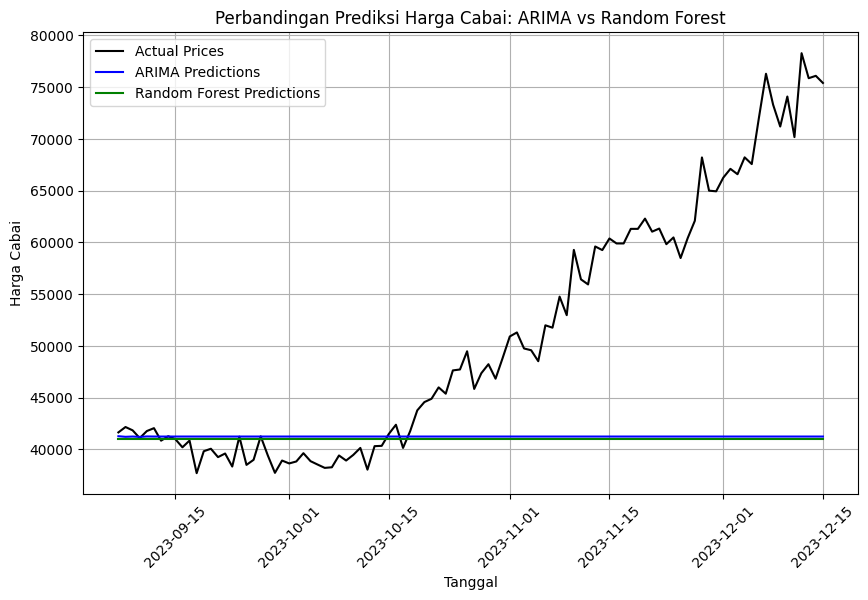

In [81]:
# Plot the actual vs predicted values for both models
plt.figure(figsize=(10,6))

# Actual prices
plt.plot(test.index, test['value'], label='Actual Prices', color='black')

# ARIMA predictions
plt.plot(test.index, arima_pred, label='ARIMA Predictions', color='blue')

# Random Forest predictions
plt.plot(test.index, rf_pred, label='Random Forest Predictions', color='green')

plt.title('Perbandingan Prediksi Harga Cabai: ARIMA vs Random Forest')
plt.xlabel('Tanggal')
plt.ylabel('Harga Cabai')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

### Menyimpan File

In [53]:
import pandas as pd
from google.colab import files

# Before creating predictions_df:
y_test = test['value']  # Re-assign y_test to match the current test DataFrame

# Save the predictions to a CSV file
predictions_df = pd.DataFrame({
    'Date': test.index,  # Use the full date index of the test DataFrame
    'Actual Prices': y_test,
    'ARIMA Predictions': arima_pred,
    'Random Forest Predictions': rf_pred
})

# Save the DataFrame to a CSV file
predictions_df.to_csv('/content/hasilpredictions.csv', index=False)


# Download the CSV file
files.download('/content/hasilpredictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>